### Importing the required Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder,StandardScaler
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [65]:
data=pd.read_csv("/content/ToyotaCorolla - MLR.csv")

# Exploratory Data Analysis

In [66]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [68]:
data[data.duplicated(keep=False)] #checking for duplicates

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
112,24950,8,13253,Diesel,116,0,2000,5,4,5,1320
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [69]:
data.drop_duplicates(keep="first",inplace=True) #removing the duplicates by keeping one of the value

In [70]:
data.isnull().sum() # checking for Null values

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


<Axes: ylabel='count'>

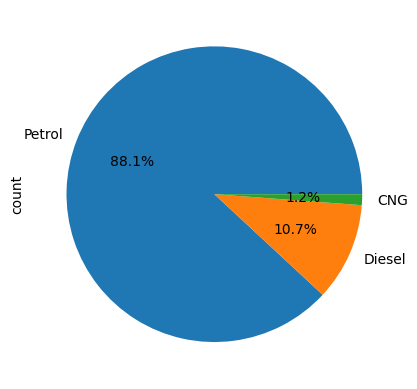

In [71]:
data["Fuel_Type"].value_counts().plot(kind="pie",autopct="%1.1f%%")

<Axes: ylabel='count'>

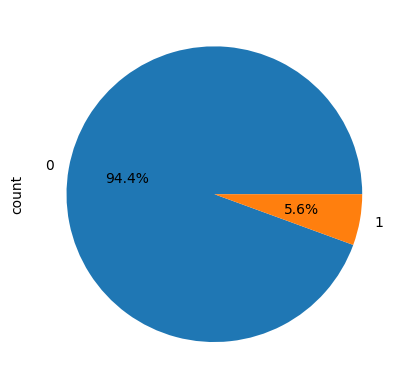

In [72]:
data["Automatic"].value_counts().plot(kind="pie",autopct="%1.1f%%")

<Axes: xlabel='Doors'>

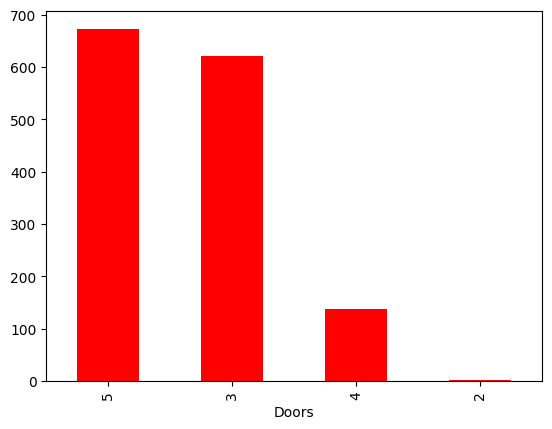

In [73]:
data["Doors"].value_counts().plot(kind="bar",color="red")

In [74]:
data["Cylinders"].value_counts() #Entire column having only one category.It will not add any value to predict.

,count
Cylinders,
4,1435


In [75]:
data.drop(["Cylinders"],axis=1,inplace=True)

<Axes: xlabel='Gears'>

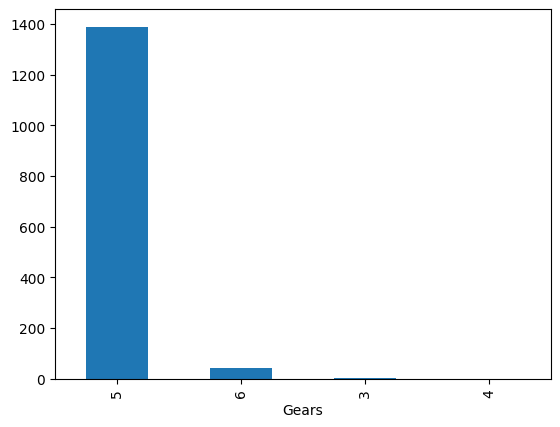

In [76]:
data["Gears"].value_counts().plot(kind="bar") #category-5 occupied most of the data.

In [77]:
data["Weight"].value_counts()

,count
Weight,
1075,192
1050,168
1015,117
1035,106
1070,89
1025,70
1065,51
1080,47
1055,43


In [78]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,5,1015


### Plotting boxplot to detect the outliers

<Axes: ylabel='Automatic'>

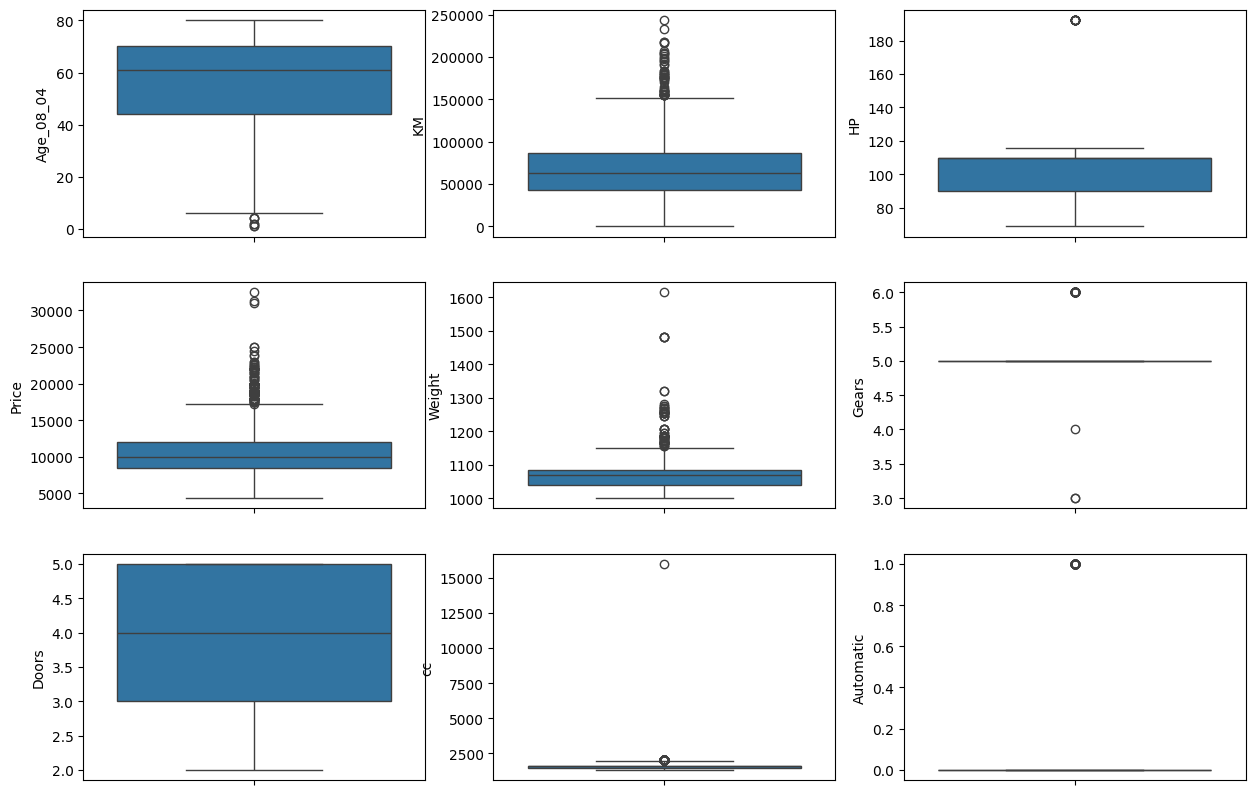

In [79]:
fig=plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.boxplot(data["Age_08_04"])
plt.subplot(3,3,2)
sns.boxplot(data["KM"])
plt.subplot(3,3,3)
sns.boxplot(data["HP"])
plt.subplot(3,3,4)
sns.boxplot(data["Price"])
plt.subplot(3,3,5)
sns.boxplot(data["Weight"])
plt.subplot(3,3,6)
sns.boxplot(data["Gears"])
plt.subplot(3,3,7)
sns.boxplot(data["Doors"])
plt.subplot(3,3,8)
sns.boxplot(data["cc"])
plt.subplot(3,3,9)
sns.boxplot(data["Automatic"])

### Treating the outliers

In [80]:
iqr_price=11950-8450          #Imputing the ouliers with IQR method.
upper_limit_price=11950+1.5*iqr_price
upper_limit_price

17200.0

In [81]:
data.Price[data["Price"]>upper_limit_price]=upper_limit_price

In [82]:
data.Price[data["Price"]>upper_limit_price].count()

0

In [83]:
data=data.rename(columns={"Age_08_04":"Age"})

In [84]:
data.describe()

,Price,Age,KM,HP,Automatic,cc,Doors,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10495.964460,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,5.026481,1072.287108
std,2977.598549,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,5.000000,1085.000000
max,17200.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,6.000000,1615.000000


In [85]:
iqr_age=75-51
upper_limit_age=75+1.5*iqr_age
upper_limit_age

111.0

In [86]:
data.Age[data["Age"]>upper_limit_age].count()

0

In [87]:
data.Age[data["Age"]>upper_limit_age]=upper_limit_age

In [88]:
data.Age[data["Age"]>upper_limit_age].count()

0

In [89]:
data.describe()

,Price,Age,KM,HP,Automatic,cc,Doors,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10495.964460,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,5.026481,1072.287108
std,2977.598549,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,5.000000,1085.000000
max,17200.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,6.000000,1615.000000


In [90]:
iqr_km=87041.5-43000
upper_limit_km=87041.5+1.5*iqr_km
upper_limit_km

153103.75

In [91]:
data.KM[data["KM"]>upper_limit_km].count()

49

In [92]:
data.KM[data["KM"]>upper_limit_km]=upper_limit_km

In [93]:
data.describe()

,Price,Age,KM,HP,Automatic,cc,Doors,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10495.964460,55.980488,67644.520383,101.491986,0.055749,1576.560976,4.032753,5.026481,1072.287108
std,2977.598549,18.563312,34725.393258,14.981408,0.229517,424.387533,0.952667,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,5.000000,1085.000000
max,17200.000000,80.000000,153103.750000,192.000000,1.000000,16000.000000,5.000000,6.000000,1615.000000


In [94]:
iqr_hp=110-90
upper_limit_hp=110+1.5*iqr_hp
upper_limit_hp

140.0

In [95]:
data.HP[data["HP"]>upper_limit_hp].count()

11

In [96]:
data.HP[data["HP"]>upper_limit_hp]=upper_limit_hp

In [97]:
data.KM[data["KM"]>upper_limit_km].count()

0

In [98]:
data.describe()

,Price,Age,KM,HP,Automatic,cc,Doors,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10495.964460,55.980488,67644.520383,101.093380,0.055749,1576.560976,4.032753,5.026481,1072.287108
std,2977.598549,18.563312,34725.393258,13.146145,0.229517,424.387533,0.952667,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,5.000000,1085.000000
max,17200.000000,80.000000,153103.750000,140.000000,1.000000,16000.000000,5.000000,6.000000,1615.000000


In [99]:
iqr_cc=1600-1400
upper_limit_cc=1600+1.5*iqr_cc
upper_limit_cc

1900.0

In [100]:
data.cc[data["cc"]>upper_limit_cc].count()

122

In [101]:
data.cc[data["cc"]>upper_limit_cc]=upper_limit_cc

In [102]:
data.cc[data["cc"]>upper_limit_cc].count()

0

all the outliers are successfully imputed.Now the data is good for apply the model.

In [103]:
data.describe()

,Price,Age,KM,HP,Automatic,cc,Doors,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10495.964460,55.980488,67644.520383,101.093380,0.055749,1558.327526,4.032753,5.026481,1072.287108
std,2977.598549,18.563312,34725.393258,13.146145,0.229517,168.788311,0.952667,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,5.000000,1085.000000
max,17200.000000,80.000000,153103.750000,140.000000,1.000000,1900.000000,5.000000,6.000000,1615.000000


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   int64  
 1   Age        1435 non-null   int64  
 2   KM         1435 non-null   float64
 3   Fuel_Type  1435 non-null   object 
 4   HP         1435 non-null   int64  
 5   Automatic  1435 non-null   int64  
 6   cc         1435 non-null   int64  
 7   Doors      1435 non-null   int64  
 8   Gears      1435 non-null   int64  
 9   Weight     1435 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 123.3+ KB


##Label Encoding

Models cannot understood the strings.so to make the models the understood we are applying the encoding the categorical columns.

In [105]:
le=LabelEncoder()
data["Fuel_Type"]=le.fit_transform(data["Fuel_Type"])
data["Doors"]=le.fit_transform(data["Doors"])
data["Gears"]=le.fit_transform(data["Gears"])



## Standardization

To compare the one column value with another column,it is recommeneded to apply the standardization.Standardization make the mean value of 0 and constant standard deviation.

In [106]:
scale=StandardScaler()
data[["Price","Age","KM","HP","cc","Weight"]]=scale.fit_transform(data[["Price","Age","KM","HP","cc","Weight"]])

In [107]:
data

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,1.009230,-1.777268,-0.595118,1,-0.844145,0,2.024972,1,2,1.774964
1,1.093220,-1.777268,0.152463,1,-0.844145,0,2.024972,1,2,1.774964
2,1.160412,-1.723380,-0.747078,1,-0.844145,0,2.024972,1,2,1.774964
3,1.496370,-1.615603,-0.565908,1,-0.844145,0,2.024972,1,2,1.774964
4,1.093220,-1.400049,-0.839578,1,-0.844145,0,2.024972,1,2,1.870688
...,...,...,...,...,...,...,...,...,...,...
1431,-1.006519,0.701602,-1.356844,2,-1.148522,0,-1.531016,1,2,-0.905299
1432,0.117261,0.863267,-1.401323,2,-1.148522,0,-1.531016,1,2,-1.096747
1433,-0.670561,0.809379,-1.458477,2,-1.148522,0,-1.531016,1,2,-1.096747
1434,-1.090508,0.755490,-1.461357,2,-1.148522,0,-1.531016,1,2,-1.096747


In [108]:
data.corr()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
Price,1.000000,-0.895158,-0.607949,0.024386,0.254427,0.035860,0.129352,0.183010,0.053141,0.491264
Age,-0.895158,1.000000,0.530947,0.076382,-0.129603,0.031354,-0.136443,-0.146929,-0.005629,-0.466484
KM,-0.607949,0.530947,1.000000,-0.398364,-0.329729,-0.082221,0.258680,-0.036618,0.019829,-0.047267
Fuel_Type,0.024386,0.076382,-0.398364,1.000000,0.458771,0.069456,-0.598360,-0.025339,0.069560,-0.502479
HP,0.254427,-0.129603,-0.329729,0.458771,1.000000,0.022541,0.098192,0.120139,0.140777,0.032802
Automatic,0.035860,0.031354,-0.082221,0.069456,0.022541,1.000000,-0.059263,-0.027492,-0.098582,0.058499
cc,0.129352,-0.136443,0.258680,-0.598360,0.098192,-0.059263,1.000000,0.138433,0.052222,0.631032
Doors,0.183010,-0.146929,-0.036618,-0.025339,0.120139,-0.027492,0.138433,1.000000,-0.160101,0.301734
Gears,0.053141,-0.005629,0.019829,0.069560,0.140777,-0.098582,0.052222,-0.160101,1.000000,0.021238
Weight,0.491264,-0.466484,-0.047267,-0.502479,0.032802,0.058499,0.631032,0.301734,0.021238,1.000000


<Axes: >

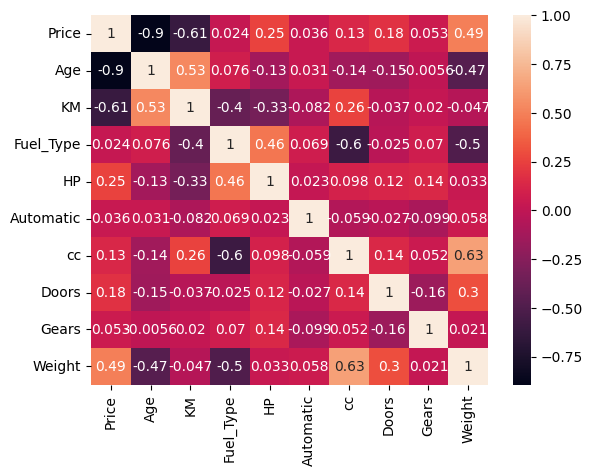

In [109]:
sns.heatmap(data.corr(),annot=True)

## Train-Test split

It is recommended to divide the data into train and test data before applying the model.If we dont split the data and directly apply the model into entire dataset,the model learns all the data and it is easily memorize the data and makes the model overfitting.

In [110]:
x=data[["Age","KM","Fuel_Type","HP","Automatic","cc","Doors","Gears","Weight"]]
y=data[["Price"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=66)
train_data=pd.concat([x_train,y_train],axis=1)
test_data=pd.concat([x_test,y_test],axis=1)             # data is splitted into train,test data.

## Applying the **Model**

In [111]:
model=smf.ols("Price~Age+KM+Fuel_Type+HP+Automatic+cc+Doors+Gears+Weight",data=train_data).fit()
model.pvalues

,0
Intercept,3.084586e-07
Age,4.773261e-220
KM,8.742675e-20
Fuel_Type,7.795518e-03
HP,1.928038e-06
Automatic,3.846881e-03
cc,4.054350e-01
Doors,1.245455e-01
Gears,9.882400e-05
Weight,5.460438e-16


In [112]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     647.8
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:42:14   Log-Likelihood:                -467.94
No. Observations:                1004   AIC:                             955.9
Df Residuals:                     994   BIC:                             1005.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8612      0.167     -5.153      0.000      -1.189      -0.533
Age           -0.7308      0.018    -41.628      0.000      -0.765      -0.696
KM            -0.1636      0.018     -9.299      0.000      -0.198      -0.129
Fuel_Type      0.1482      0.056      2.666      0.008       0.039       0.257
HP             0.0782      0.016      4.789      0.000       0.046       0.110
Automatic      0.1617      0.056      2.897      0.004       0.052       0.271
cc            -0.0167      0.020     -0.832      0.405      -0.056       0.023
Doors          0.0215      0.014      1.537      0.125      -0.006       0.049
Gears          0.2591      0.066      3.909      0.000       0.129       0.389
Weight         0.1700      0.021      8.238      0.000       0.129       0.210
==============================================================================
Omnibus:                       89.014   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.947
Skew:                          -0.415   Prob(JB):                     2.68e-61
Kurtosis:                       5.445   Cond. No.                         52.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The columns cc and doors having p value greater than 0.05 shows they are highly correlated and it decreases the model accuracy.

In [113]:
model_cc=smf.ols("Price~cc",data=train_data).fit()
model_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     13.68
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           0.000229
Time:                        11:42:14   Log-Likelihood:                -1428.2
No. Observations:                1004   AIC:                             2860.
Df Residuals:                    1002   BIC:                             2870.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0013      0.032      0.042      0.966      -0.061       0.064
cc             0.1160      0.031      3.698      0.000       0.054       0.178
==============================================================================
Omnibus:                       86.146   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.114
Skew:                           0.804   Prob(JB):                     3.34e-24
Kurtosis:                       3.011   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
model_doors=smf.ols("Price~Doors",data=train_data).fit()
model_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     35.67
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           3.25e-09
Time:                        11:42:14   Log-Likelihood:                -1417.4
No. Observations:                1004   AIC:                             2839.
Df Residuals:                    1002   BIC:                             2849.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3959      0.074     -5.371      0.000      -0.541      -0.251
Doors          0.1965      0.033      5.972      0.000       0.132       0.261
==============================================================================
Omnibus:                       96.116   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.415
Skew:                           0.857   Prob(JB):                     1.59e-27
Kurtosis:                       3.123   Cond. No.                         6.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
model_cc_doors=smf.ols("Price~cc+Doors",data=train_data).fit()
model_cc_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     22.71
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           2.27e-10
Time:                        11:42:14   Log-Likelihood:                -1412.7
No. Observations:                1004   AIC:                             2831.
Df Residuals:                    1001   BIC:                             2846.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3728      0.074     -5.053      0.000      -0.518      -0.228
cc             0.0956      0.031      3.074      0.002       0.035       0.157
Doors          0.1847      0.033      5.597      0.000       0.120       0.249
==============================================================================
Omnibus:                       85.191   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.236
Skew:                           0.795   Prob(JB):                     8.53e-24
Kurtosis:                       3.105   Cond. No.                         6.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
train_data.drop(["cc","Doors"],axis=1,inplace=True) #Removing the cc and Doors column

In [117]:
model_1=smf.ols("Price~Age+KM+Fuel_Type+Automatic+HP+Gears+Weight",data=train_data).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     831.3
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:42:15   Log-Likelihood:                -469.56
No. Observations:                1004   AIC:                             955.1
Df Residuals:                     996   BIC:                             994.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8326      0.155     -5.368      0.000      -1.137      -0.528
Age           -0.7319      0.018    -41.765      0.000      -0.766      -0.698
KM            -0.1649      0.017     -9.580      0.000      -0.199      -0.131
Fuel_Type      0.1818      0.049      3.705      0.000       0.086       0.278
Automatic      0.1568      0.055      2.838      0.005       0.048       0.265
HP             0.0733      0.015      4.945      0.000       0.044       0.102
Gears          0.2357      0.065      3.637      0.000       0.109       0.363
Weight         0.1712      0.018      9.713      0.000       0.137       0.206
==============================================================================
Omnibus:                       89.801   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.327
Skew:                          -0.427   Prob(JB):                     1.63e-60
Kurtosis:                       5.419   Cond. No.                         39.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Applying cooks distance and plotting it

In [118]:
influence=model_1.get_influence()
(c,_)=influence.cooks_distance

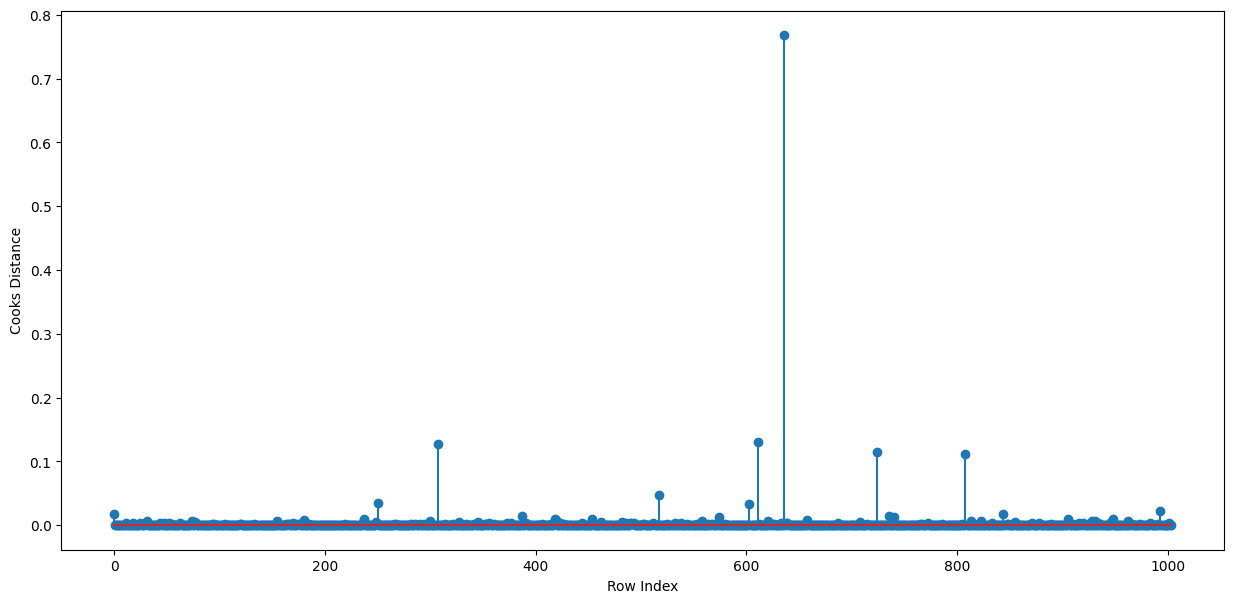

In [119]:
fig=plt.figure(figsize=(15,7))
plt.stem(np.arange(len(train_data)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [120]:
np.argmax(c),np.max(c)

(636, 0.7676279342948118)

In [121]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1004 entries, 393 to 1045
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1004 non-null   float64
 1   KM         1004 non-null   float64
 2   Fuel_Type  1004 non-null   int64  
 3   HP         1004 non-null   float64
 4   Automatic  1004 non-null   int64  
 5   Gears      1004 non-null   int64  
 6   Weight     1004 non-null   float64
 7   Price      1004 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 70.6 KB


In [122]:
train_data.shape

(1004, 8)

In [123]:
k=train_data.shape[1]
n=train_data.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.026892430278884466

## Influence plot

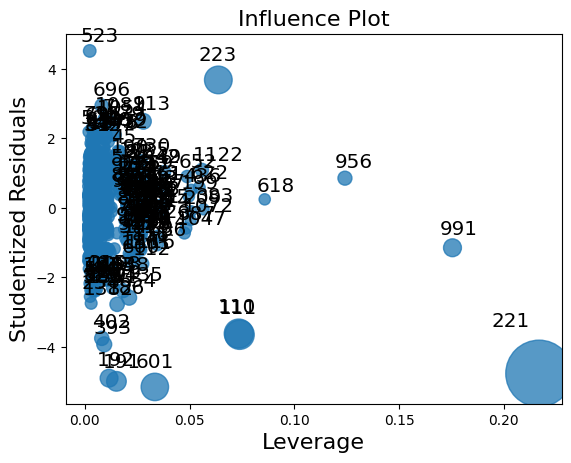

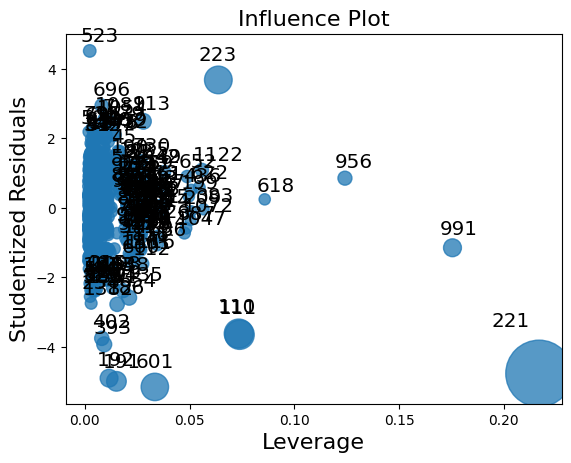

In [124]:
influence_plot(model_1)

The Leverage cut-off value was 0.0268 and most of the datapoints are outside the cut-off value.so we have to remove those datapoints(row index).we are removing the rows which are affecting the model accuracy.


In [125]:
train_data_1=train_data.drop(train_data.index[[221,991,956,618,223,110,111,652,199,636,]],axis=0).reset_index()

In [126]:
train_data_1.drop(["index"],axis=1,inplace=True)

In [127]:
k=train_data_1.shape[1]
n=train_data_1.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.02716297786720322

In [128]:
model_2=smf.ols("Price~Age+KM+Fuel_Type+Automatic+HP+Gears+Weight",data=train_data_1).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     844.3
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:42:18   Log-Likelihood:                -454.02
No. Observations:                 994   AIC:                             924.0
Df Residuals:                     986   BIC:                             963.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9321      0.155     -6.000      0.000      -1.237      -0.627
Age           -0.7168      0.018    -40.442      0.000      -0.752      -0.682
KM            -0.1646      0.017     -9.611      0.000      -0.198      -0.131
Fuel_Type      0.2511      0.051      4.930      0.000       0.151       0.351
Automatic      0.1258      0.056      2.253      0.025       0.016       0.235
HP             0.0646      0.015      4.351      0.000       0.035       0.094
Gears          0.2233      0.064      3.480      0.001       0.097       0.349
Weight         0.2138      0.020     10.831      0.000       0.175       0.253
==============================================================================
Omnibus:                       99.638   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              339.748
Skew:                          -0.452   Prob(JB):                     1.68e-74
Kurtosis:                       5.718   Cond. No.                         40.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
influence=model_2.get_influence()
(c,_)=influence.cooks_distance

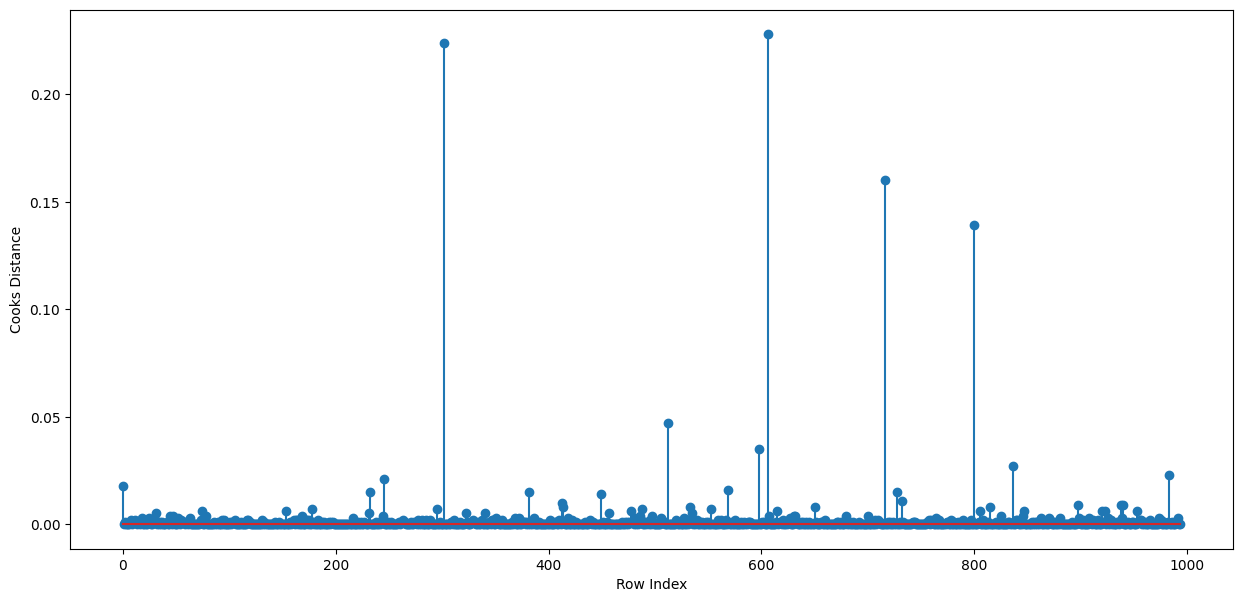

In [130]:
fig=plt.figure(figsize=(15,7))
plt.stem(np.arange(len(train_data_1)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [131]:
np.argmax(c),np.max(c)

(606, 0.22819334400621996)

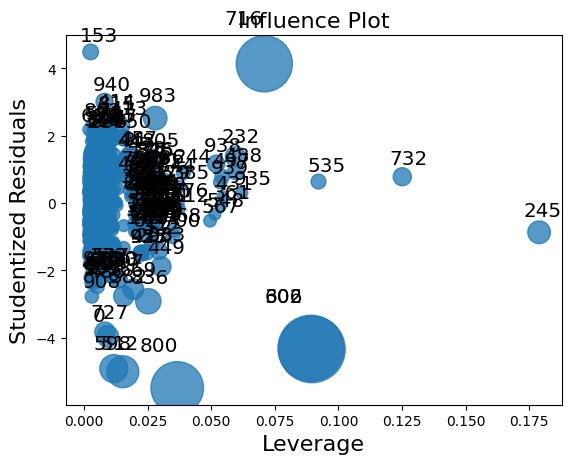

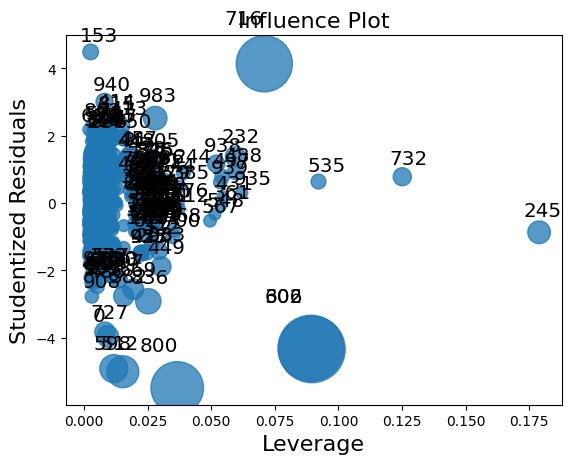

In [132]:
influence_plot(model_2)

In [133]:
k=train_data_1.shape[1]
n=train_data_1.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.02716297786720322

In [134]:
train_data_2=train_data_1.drop(train_data_1.index[[245,732,535,716,606,302,232,938,488,497,939,935,431,361,548,567]],axis=0).reset_index()

In [135]:
train_data_2.drop(["index"],axis=1,inplace=True)

In [136]:
train_data_2.shape

(978, 8)

In [137]:
model_3=smf.ols("Price~Age+KM+Fuel_Type+Automatic+HP+Gears+Weight",data=train_data_2).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     905.6
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:42:21   Log-Likelihood:                -407.86
No. Observations:                 978   AIC:                             831.7
Df Residuals:                     970   BIC:                             870.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8215      0.224     -8.143      0.000      -2.260      -1.382
Age           -0.6798      0.018    -38.585      0.000      -0.714      -0.645
KM            -0.1587      0.017     -9.432      0.000      -0.192      -0.126
Fuel_Type      0.7449      0.092      8.127      0.000       0.565       0.925
Automatic      0.0299      0.056      0.537      0.592      -0.079       0.139
HP            -0.0240      0.020     -1.176      0.240      -0.064       0.016
Gears          0.2056      0.071      2.910      0.004       0.067       0.344
Weight         0.3785      0.028     13.582      0.000       0.324       0.433
==============================================================================
Omnibus:                      102.232   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.451
Skew:                          -0.448   Prob(JB):                     1.09e-82
Kurtosis:                       5.909   Cond. No.                         60.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
influence=model_3.get_influence()
(c,_)=influence.cooks_distance

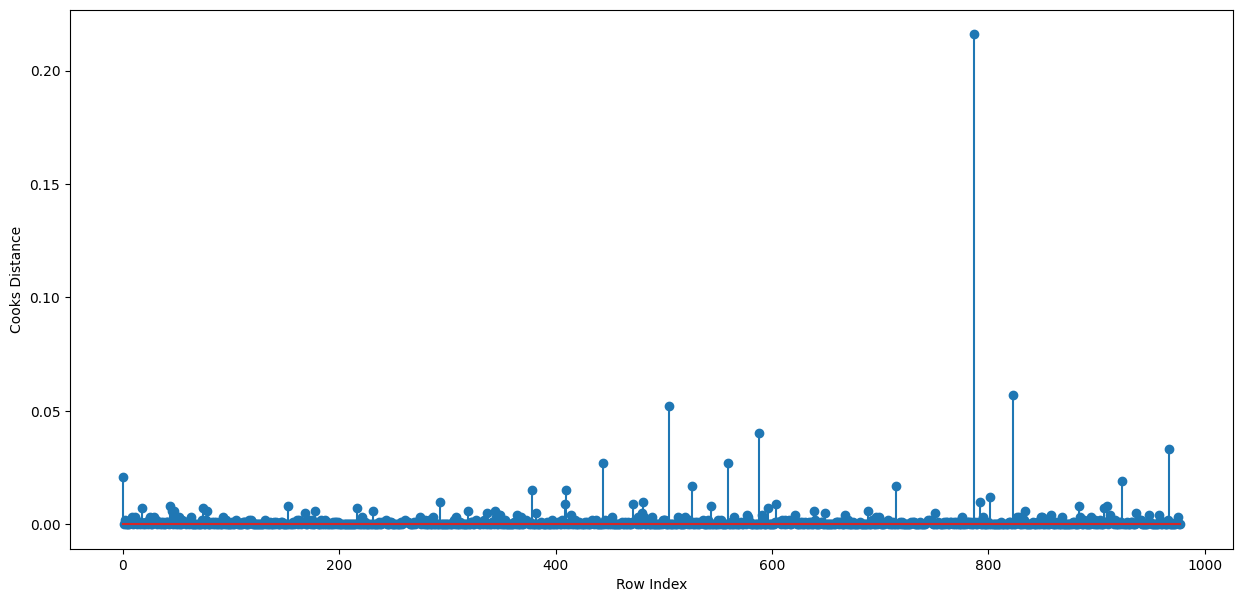

In [139]:
fig=plt.figure(figsize=(15,7))
plt.stem(np.arange(len(train_data_2)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [140]:
np.argmax(c),np.max(c)

(787, 0.21562663410690758)

In [141]:
k=train_data_2.shape[1]
n=train_data_2.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.027607361963190184

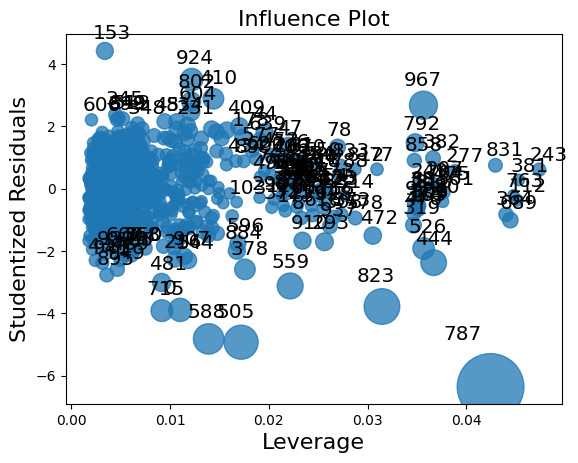

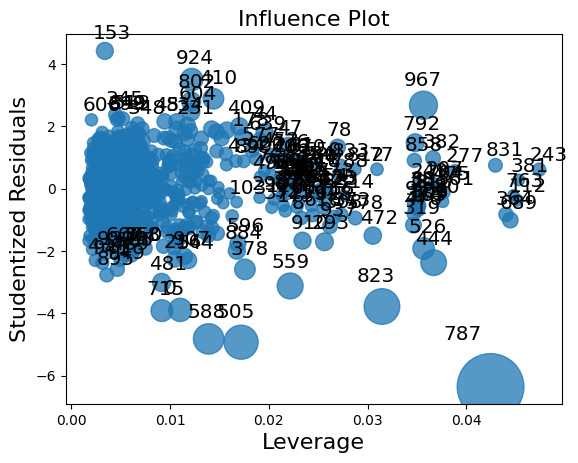

In [142]:
influence_plot(model_3)

In [143]:
train_data_3=train_data_2.drop(train_data_2.index[[243,381,763,112,364,689,787,831,967,792,858,382,277,319,526,444,823,472,]],axis=0).reset_index()

In [144]:
train_data_3.drop(["index"],axis=1,inplace=True)

In [145]:
model_4=smf.ols("Price~Age+KM+Fuel_Type+Automatic+HP+Gears+Weight",data=train_data_3).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     944.6
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:42:24   Log-Likelihood:                -364.16
No. Observations:                 960   AIC:                             744.3
Df Residuals:                     952   BIC:                             783.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5855      0.250     -6.336      0.000      -2.077      -1.094
Age           -0.6540      0.017    -37.790      0.000      -0.688      -0.620
KM            -0.1816      0.017    -10.912      0.000      -0.214      -0.149
Fuel_Type      0.7467      0.089      8.399      0.000       0.572       0.921
Automatic     -0.0033      0.054     -0.062      0.951      -0.109       0.102
HP            -0.0276      0.020     -1.387      0.166      -0.067       0.011
Gears          0.0908      0.090      1.007      0.314      -0.086       0.268
Weight         0.4291      0.028     15.466      0.000       0.375       0.483
==============================================================================
Omnibus:                       56.709   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.738
Skew:                          -0.272   Prob(JB):                     1.52e-34
Kurtosis:                       4.897   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

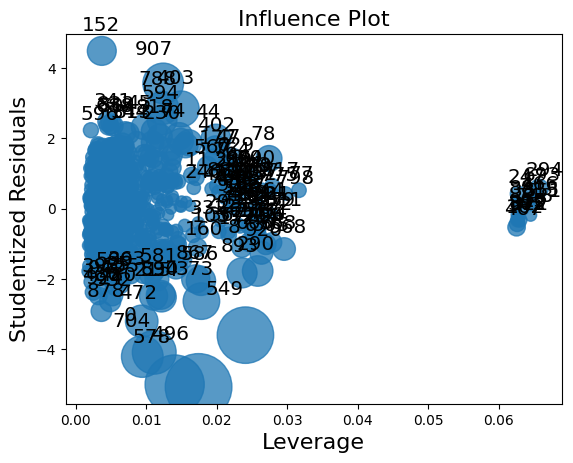

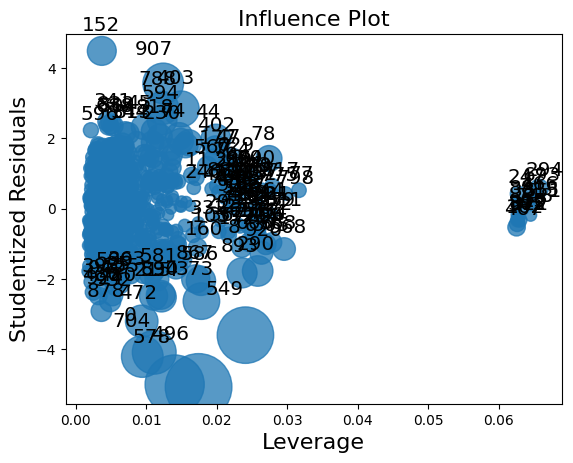

In [146]:
influence_plot(model_4)

In [147]:
k=train_data_3.shape[1]
n=train_data_3.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.028124999999999997

In [148]:
train_data_4=train_data_3.drop(train_data_3.index[[294,693,246,464]],axis=0).reset_index()

In [149]:
train_data_4.drop(["index"],axis=1,inplace=True)

In [150]:
train_data_4.drop(["Automatic","HP","Gears"],axis=1,inplace=True)

In [151]:
model_5=smf.ols("Price~Age+KM+Fuel_Type+Weight",data=train_data_4).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1649.
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:42:27   Log-Likelihood:                -364.55
No. Observations:                 956   AIC:                             739.1
Df Residuals:                     951   BIC:                             763.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2296      0.104    -11.876      0.000      -1.433      -1.026
Age           -0.6572      0.017    -38.999      0.000      -0.690      -0.624
KM            -0.1830      0.017    -10.993      0.000      -0.216      -0.150
Fuel_Type      0.6547      0.055     11.925      0.000       0.547       0.762
Weight         0.4083      0.021     19.044      0.000       0.366       0.450
==============================================================================
Omnibus:                       55.376   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.758
Skew:                          -0.278   Prob(JB):                     1.36e-32
Kurtosis:                       4.837   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

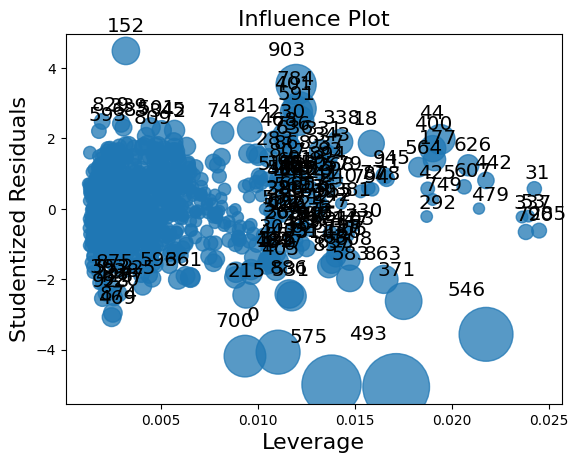

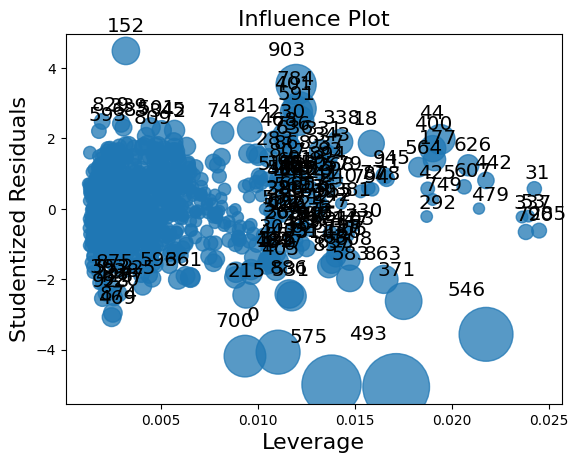

In [152]:
influence_plot(model_5)

In [153]:
k=train_data_4.shape[1]
n=train_data_4.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.01882845188284519

In [154]:
train_data_5=train_data_4.drop(train_data_4.index[[31,35,337,285,790]],axis=0).reset_index()

In [155]:
train_data_5.drop(["index"],axis=1,inplace=True)

## Applying Final Model

Finally after deleting many rows and columns we got the best model accuracy.


In [156]:
Final_model=smf.ols("Price~Age+KM+Fuel_Type+Weight",data=train_data_5).fit()
Final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1594.
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:42:32   Log-Likelihood:                -364.20
No. Observations:                 951   AIC:                             738.4
Df Residuals:                     946   BIC:                             762.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2214      0.104    -11.755      0.000      -1.425      -1.017
Age           -0.6561      0.017    -38.806      0.000      -0.689      -0.623
KM            -0.1845      0.017    -11.033      0.000      -0.217      -0.152
Fuel_Type      0.6503      0.055     11.807      0.000       0.542       0.758
Weight         0.4094      0.022     18.666      0.000       0.366       0.452
==============================================================================
Omnibus:                       55.394   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.007
Skew:                          -0.282   Prob(JB):                     1.97e-32
Kurtosis:                       4.835   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
x_test.drop(["HP","Automatic","cc","Doors","Gears"],axis=1,inplace=True)


In [158]:
x_test

,Age,KM,Fuel_Type,Weight
1133,0.809379,1.109243,2,-1.096747
1397,0.809379,-0.549315,2,-1.096747
1345,1.132710,-0.172744,2,-0.043786
1387,1.186598,-0.442410,2,0.798582
805,0.108828,0.159232,2,0.051938
...,...,...,...,...
19,-1.400049,-0.094647,2,0.626280
1362,0.755490,-0.248537,2,0.147661
331,-1.130607,-0.999719,2,0.147661
650,0.216605,1.369691,0,0.128517


In [159]:
y_pred=Final_model.predict(x_test)   #predicting using model

In [160]:
y_pred

,0
1133,-1.105421
1397,-0.799337
1345,-0.649906
1387,-0.290645
805,-0.000215
...,...
19,1.271739
1362,-0.310050
331,1.066049
650,-1.563648


In [161]:
y_test

,Price
1133,-0.586571
1397,-1.006519
1345,-0.754550
1387,-1.023317
805,-0.334602
...,...
19,2.168286
1362,-0.754550
331,1.160412
650,-0.351400


## Evaluating the model

In [163]:
MSE=mean_squared_error(y_pred,y_test)     # checking mean square error
MSE*100

16.54540228721948

In [164]:
Accuracy=r2_score(y_pred,y_test)           #Checking for Modal Accuracy
Accuracy*100

83.14658280155976

In [165]:
x_train.drop(["Automatic","HP","cc","Doors","Gears"],axis=1,inplace=True)

# Applying Ridge and Lasso methods

L1-Lasso and L2-Ridge are the regularization methods to make the model not to overfit and underfit.

In [166]:
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)


Ridge(alpha=1)

In [167]:
y_pred = ridgeR.predict(x_test)



In [168]:
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)


0.13636827798900866


In [169]:
r2_score_ridge = r2_score(y_pred, y_test)
print(r2_score_ridge)

0.8422084815284885


In [170]:
x_train

,Age,KM,Fuel_Type,Weight
393,0.001051,1.771958,1,0.722003
1213,1.294375,0.531914,2,-0.330957
768,0.162717,0.319920,1,1.583517
611,0.593825,2.461859,2,-0.426681
431,-0.322279,0.434718,2,-0.809576
...,...,...,...,...
1147,1.024933,0.965465,2,0.243385
51,-1.400049,-0.304164,2,0.722003
632,0.593825,1.704116,1,1.200622
829,0.108828,0.031068,2,-0.905299


In [171]:
y_train

,Price
393,-2.031191
1213,-1.258487
768,0.152537
611,-0.855338
431,0.152537
...,...
1147,-0.687359
51,1.765136
632,-0.233815
829,-0.418592


In [172]:
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train, y_train)




Lasso(alpha=0.1)

In [173]:
y_pred=lasso.predict(x_test)

In [174]:
y_test

,Price
1133,-0.586571
1397,-1.006519
1345,-0.754550
1387,-1.023317
805,-0.334602
...,...
19,2.168286
1362,-0.754550
331,1.160412
650,-0.351400


In [175]:
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,-0.791435
1,-0.562370
2,-0.788191
3,-0.745127
4,-0.104700
...,...
426,1.027783
427,-0.500871
428,0.937198
429,-0.344130


In [176]:
r2_score_lasso = r2_score(y_test,y_pred)
print(r2_score_lasso)

0.8363480430359217


In [177]:
mean_squared_error_lasso = mean_squared_error(y_test,y_pred)
print(mean_squared_error_lasso)

0.15567010389831384


# Conclusion

A model was prepared using MultiLinearRegression.This model can predict the price of Toyota car using the features of age,km,fuel_type,weight.After doing the entire analysis,it was found that age,km,fuel_type,weight are the most important features to predict the price of car.After building the model,the model was applied to two regularization methods L1 and L2(lasso and ridge).These Methods makes the model regularize(It will avoid overfit or underfit).